In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import pandas as pd


from bs4 import BeautifulSoup
import json
import requests

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from pandas import DataFrame

In [2]:
all_lines = pd.read_json('all_scripts_raw.json')
all_scripts = pd.read_json('all_scripts_raw.json')

In [4]:
all_scripts

,DS9,TOS,TAS,TNG,VOY,ENT
episode 0,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\nThe Voyager Transcripts - Caretaker\...,\n\n\n\n\n\nThe Enterprise Transcripts - Broke...
episode 1,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\nThe Voyager Transcripts - Parallax...,\n\n\n\n\n\nThe Enterprise Transcripts - Fight...
episode 2,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\nThe Voyager Transcripts - Time and...,\n\n\n\n\n\nThe Enterprise Transcripts - Stran...
episode 3,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\n\nThe Voyager Transcripts - Phage\...,\n\n\n\n\n\nThe Enterprise Transcripts - Unexp...
episode 4,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...,\n\n\n\n\n\nThe Animated Star Trek Transcripts...,\n\n\n\n\n\nThe Next Generation Transcripts - ...,\n\n\n\n\n\nThe Voyager Transcripts - The Clou...,\n\n\n\n\n\nThe Enterprise Transcripts - Terra...
...,...,...,...,...,...,...
episode 171,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,NaN,NaN,\n\n\n\n\n\nThe Next Generation Transcripts - ...,NaN,NaN
episode 172,\n\n\n\n\n\nThe Deep Space Nine Transcripts - ...,NaN,NaN,\n\n\n\n\n\nThe Next Generation Transcripts - ...,NaN,NaN
episode 173,NaN,NaN,NaN,\n\n\n\n\n\nThe Next Generation Transcripts - ...,NaN,NaN
episode 174,NaN,NaN,NaN,\n\n\n\n\n\nThe Next Generation Transcripts - ...,NaN,NaN


In [5]:
fileref = open('Star_trek.txt', 'r', encoding="utf8")
star_trek = fileref.read()

In [6]:
scr_1 = star_trek.lower()

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
string.digits

'0123456789'

In [9]:
star_trek="".join([char for char in scr_1 if char not in string.punctuation and char not in string.digits])

In [10]:
star_trek = re.sub(r'http\S+', '', star_trek)

In [11]:
stop_words = stopwords.words('english')

In [12]:
stop_words.append('�')

In [13]:
otherlist = ["’","im","i'll","you'll","he'll","she'll","it'll","we'll","they'll",
                 "i've","you've","he've","she've","it've","we've","they've",
                 "i'd","you'd","he'd","she'd","it'd","we'd","they'd", "i'm"]
    
    

In [14]:
for i in otherlist:
    stop_words.append(i)

In [15]:
star_trek = word_tokenize(star_trek)


In [16]:
print('# of words before filtering: ', len(star_trek))

# of words before filtering:  3254199


In [17]:
filtered_words = [word for word in star_trek if word not in stop_words]

In [18]:
filtered_df = DataFrame(filtered_words,columns=['words'])
#filtered_df.to_csv('filtered_df_StaTre.csv')

In [19]:
filtered_df

,words
0,klaang
1,pung
2,ghap
3,pung
4,ghap
...,...
1839750,well
1839751,ill
1839752,see
1839753,devron


In [20]:
print('# of words after filtering: ', len(filtered_words))
print('Loss Percentage: ', "{:.2f}".format((100-(len(filtered_words)/len(star_trek))*100)))

# of words after filtering:  1839755
Loss Percentage:  43.47


In [22]:
my_dict = {}
for i in filtered_words:
    if i not in my_dict:
        my_dict[i] = 1
    else:
        my_dict[i] = my_dict[i] + 1
        
my_list = []        
for i in my_dict:
    my_list.append([i, my_dict[i]])

#print(sorted(my_list))

def Sort(sub_li): 
  
    sub_li.sort(key = lambda x: x[1], reverse=True)
    
    return sub_li 

Sort(my_list)

for i in my_list:
    print(i)

occurr = {1:0, 2:0, 4:0, 8:0, 16:0, 32:0, 64:0, 128:0, 256:0, 512:0, 1024:0, 1025:0}
percent = {}

for i in my_list:
    if i[1] == 1:
        occurr[1] = occurr[1] + 1
    elif i[1] == 2:
        occurr[2] = occurr[2] + 1
    elif i[1] <= 4:
        occurr[4] = occurr[4] + 1
    elif i[1] <= 8:
        occurr[8] = occurr[8] + 1    
    elif i[1] <= 16:
        occurr[16] = occurr[16] + 1
    elif i[1] <= 32:
        occurr[32] = occurr[32] + 1  
    elif i[1] <= 64:
        occurr[64] = occurr[64] + 1
    elif i[1] <= 128:
        occurr[128] = occurr[128] + 1  
    elif i[1] <= 256:
        occurr[256] = occurr[256] + 1
    elif i[1] <= 512:
        occurr[512] = occurr[512] + 1
    elif i[1] <= 1024:
        occurr[1024] = occurr[1024] + 1
    elif i[1] >= 1025:
        occurr[1025] = occurr[1025] + 1 

for i in occurr:
    percent[str(i)] = float("{:.2f}".format((occurr[i] / len(my_list))*100))

['captain', 14174]
['dont', 12995]
['one', 11923]
['know', 11314]
['well', 10142]
['us', 9924]
['youre', 9062]
['sir', 8822]
['get', 8459]
['like', 8171]
['would', 7903]
['going', 7536]
['right', 7333]
['time', 7114]
['think', 6814]
['thats', 6795]
['want', 6551]
['could', 6419]
['see', 6335]
['yes', 6289]
['go', 5959]
['ive', 5917]
['mister', 5889]
['ship', 5865]
['ill', 5519]
['doctor', 5498]
['take', 5386]
['two', 5231]
['back', 5218]
['way', 5207]
['cant', 4833]
['come', 4696]
['good', 4511]
['commander', 4300]
['need', 4268]
['got', 4113]
['theres', 4094]
['something', 4029]
['make', 4023]
['tell', 3940]
['hes', 3886]
['theyre', 3806]
['find', 3777]
['people', 3688]
['three', 3686]
['never', 3650]
['must', 3620]
['oh', 3523]
['may', 3505]
['help', 3437]
['say', 3361]
['weve', 3318]
['course', 3317]
['still', 3266]
['didnt', 3216]
['first', 3120]
['sure', 3094]
['look', 3037]
['let', 3037]
['much', 2909]
['youve', 2899]
['long', 2876]
['maybe', 2866]
['id', 2860]
['computer', 2857]

In [23]:
word_count = DataFrame(my_list,columns=['Word','Frequency'])
#word_count.to_csv('word_count_Sta_tre.csv')

In [24]:
word_count

,Word,Frequency
0,captain,14174
1,dont,12995
2,one,11923
3,know,11314
4,well,10142
...,...,...
104082,theyllcollapse,1
104083,gaines,1
104084,ourcloak,1
104085,thisarrangement,1


In [33]:
word_count['Frequency'].sum()

1839755

In [ ]:
1839755

In [35]:
word_count['part_fre'] = word_count.Frequency / 1839755

In [37]:
word_count['total'] = 

0.007704286712089382

In [38]:
word_count = word_count.assign(Area = lambda word_count: word_count.Frequency/1839755)

In [39]:
word_count

,Word,Frequency,part_fre,Area
0,captain,14174,7.704287e-03,7.704287e-03
1,dont,12995,7.063441e-03,7.063441e-03
2,one,11923,6.480754e-03,6.480754e-03
3,know,11314,6.149732e-03,6.149732e-03
4,well,10142,5.512691e-03,5.512691e-03
...,...,...,...,...
104082,theyllcollapse,1,5.435506e-07,5.435506e-07
104083,gaines,1,5.435506e-07,5.435506e-07
104084,ourcloak,1,5.435506e-07,5.435506e-07
104085,thisarrangement,1,5.435506e-07,5.435506e-07


In [25]:
len(my_list)

104087

In [26]:
occurr

{1: 64800,
 2: 11803,
 4: 8464,
 8: 5782,
 16: 3901,
 32: 2729,
 64: 2200,
 128: 1985,
 256: 1368,
 512: 475,
 1024: 321,
 1025: 259}

In [27]:
frequency = pd.DataFrame(list(occurr.items()),columns = ['Frequency','Total'])
#frequency.to_csv('frequency_StaTre.csv')

In [28]:
frequency

,Frequency,Total
0,1,64800
1,2,11803
2,4,8464
3,8,5782
4,16,3901
5,32,2729
6,64,2200
7,128,1985
8,256,1368
9,512,475


In [29]:
#percentage.to_csv('percentage.csv')

In [30]:
percentage = pd.DataFrame(list(percent.items()),columns = ['Frequency','Percentage'])
#percentage.to_csv('percentage.csv')

In [31]:
percent

{'1': 62.26,
 '2': 11.34,
 '4': 8.13,
 '8': 5.55,
 '16': 3.75,
 '32': 2.62,
 '64': 2.11,
 '128': 1.91,
 '256': 1.31,
 '512': 0.46,
 '1024': 0.31,
 '1025': 0.25}

<BarContainer object of 12 artists>

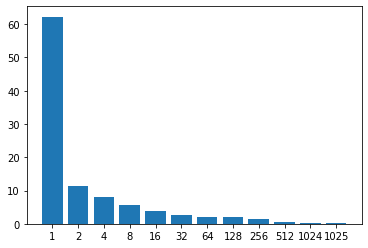

In [32]:
keys = percent.keys()
values = percent.values()

plt.bar(keys, values)

In [ ]:
word_count